# Analysis of the Millenium Development Goals Dataset 

### First, import the functions that are to be used for the analysis

In [416]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Ignore some warnings that arise because of version incompatibility and associated issues

In [372]:
import warnings
warnings.filterwarnings('ignore')

### Import the excel data into a dataframe and inspect it

In [373]:
ls

P_Data_Extract_From_Millennium_Development_Goals.xlsx


In [374]:
mdg=pd.read_excel("P_Data_Extract_From_Millennium_Development_Goals.xlsx")

In [375]:
type(mdg)

pandas.core.frame.DataFrame

In [376]:
mdg.head()

,Time,Time Code,Country Name,Country Code,"Primary completion rate, total (% of relevant age group) [SE.PRM.CMPT.ZS]","Population, total [SP.POP.TOTL]",Population living in slums (% of urban population) [EN.POP.SLUM.UR.ZS],"Adjusted net enrollment rate, primary (% of primary school age children) [SE.PRM.TENR]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]","School enrollment, primary (% net) [SE.PRM.NENR]"
0,1990,YR1990,Afghanistan,AFG,NaN,12249114.0,NaN,NaN,49.856,NaN,NaN
1,1990,YR1990,Albania,ALB,NaN,3286542.0,NaN,NaN,71.836,NaN,NaN
2,1990,YR1990,Algeria,DZA,77.014061,25912367.0,11.8,85.390411,66.725,NaN,85.390411
3,1990,YR1990,American Samoa,ASM,NaN,47038.0,NaN,NaN,NaN,NaN,NaN
4,1990,YR1990,Andorra,AND,NaN,54509.0,NaN,NaN,NaN,NaN,NaN


In [377]:
mdg.shape

(5647, 11)

In [378]:
mdg.columns

Index(['Time', 'Time Code', 'Country Name', 'Country Code',
       'Primary completion rate, total (% of relevant age group) [SE.PRM.CMPT.ZS]',
       'Population, total [SP.POP.TOTL]',
       'Population living in slums (% of urban population) [EN.POP.SLUM.UR.ZS]',
       'Adjusted net enrollment rate, primary (% of primary school age children) [SE.PRM.TENR]',
       'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]',
       'Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]',
       'School enrollment, primary (% net) [SE.PRM.NENR]'],
      dtype='object')

### Extract only the columns of interest

In [379]:
df= mdg.iloc[:, [0, 2, 4, 5, 8, 9]]

In [380]:
df.head(7)

,Time,Country Name,"Primary completion rate, total (% of relevant age group) [SE.PRM.CMPT.ZS]","Population, total [SP.POP.TOTL]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]"
0,1990,Afghanistan,NaN,12249114.0,49.856,NaN
1,1990,Albania,NaN,3286542.0,71.836,NaN
2,1990,Algeria,77.014061,25912367.0,66.725,NaN
3,1990,American Samoa,NaN,47038.0,NaN,NaN
4,1990,Andorra,NaN,54509.0,NaN,NaN
5,1990,Angola,NaN,12171441.0,41.696,NaN
6,1990,Antigua and Barbuda,NaN,66696.0,71.351,NaN


In [381]:
df.tail(7)

,Time,Country Name,"Primary completion rate, total (% of relevant age group) [SE.PRM.CMPT.ZS]","Population, total [SP.POP.TOTL]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]"
5640,2015,Zambia,NaN,16100587.0,61.397,NaN
5641,2015,Zimbabwe,NaN,15777451.0,60.398,NaN
5642,NaN,NaN,NaN,NaN,NaN,NaN
5643,NaN,NaN,NaN,NaN,NaN,NaN
5644,NaN,NaN,NaN,NaN,NaN,NaN
5645,Data from database: Millennium Development Goals,NaN,NaN,NaN,NaN,NaN
5646,Last Updated: 09/19/2018,NaN,NaN,NaN,NaN,NaN


### Drop the last five rows that do not have any relevant data in them

In [382]:
df = df.drop(index=[5642, 5643, 5644, 5645, 5646], axis = 0)

In [383]:
df.tail(5)

,Time,Country Name,"Primary completion rate, total (% of relevant age group) [SE.PRM.CMPT.ZS]","Population, total [SP.POP.TOTL]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]"
5637,2015,Virgin Islands (U.S.),NaN,107710.0,79.168293,NaN
5638,2015,West Bank and Gaza,95.790749,4422143.0,73.299000,96.690727
5639,2015,"Yemen, Rep.",NaN,26916207.0,64.743000,NaN
5640,2015,Zambia,NaN,16100587.0,61.397000,NaN
5641,2015,Zimbabwe,NaN,15777451.0,60.398000,NaN


In [384]:
len(df['Country Name'].unique())

217

In [386]:
countries = df[df['Time']==2015]['Country Name'].unique()
countries[1:10]

array(['Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba'],
      dtype=object)

### Rename the colums with shorter, but more descriptive, names

In [387]:
df.head()

,Time,Country Name,"Primary completion rate, total (% of relevant age group) [SE.PRM.CMPT.ZS]","Population, total [SP.POP.TOTL]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]"
0,1990,Afghanistan,NaN,12249114.0,49.856,NaN
1,1990,Albania,NaN,3286542.0,71.836,NaN
2,1990,Algeria,77.014061,25912367.0,66.725,NaN
3,1990,American Samoa,NaN,47038.0,NaN,NaN
4,1990,Andorra,NaN,54509.0,NaN,NaN


In [388]:
df.columns = ['Year', 'Country', 'Primary completion rate', 'Population', 'Life expectancy at birth', 'Adult literacy rate']

In [389]:
df.head()

,Year,Country,Primary completion rate,Population,Life expectancy at birth,Adult literacy rate
0,1990,Afghanistan,NaN,12249114.0,49.856,NaN
1,1990,Albania,NaN,3286542.0,71.836,NaN
2,1990,Algeria,77.014061,25912367.0,66.725,NaN
3,1990,American Samoa,NaN,47038.0,NaN,NaN
4,1990,Andorra,NaN,54509.0,NaN,NaN


# Question 1: What are the top 10 highly populated countried in the world in the most recent year?

### First determine the minimum and maximum years to find the most recent year in the dataframe

In [390]:
print(f"The minimum year is {df.Year.min()} and the maximum year is {df.Year.max()}")

The minimum year is 1990 and the maximum year is 2015


### Filter the dataframe to find the top 10 most populated countries in 2015

In [391]:
df2= df[df['Year']==2015].sort_values(by='Population', ascending=False).head(10)

[Text(0.5, 1.0, 'The top 10 most populous countries in 2015')]

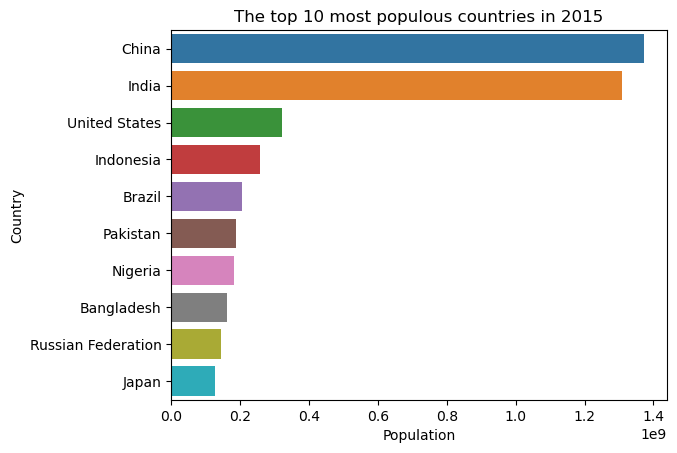

In [392]:
sns.barplot(y='Country', x='Population', 
            data= df2).set(title ="The top 10 most populous countries in 2015")


# Question 2: Top 10 countries in life expectancy in 2015


### Extract the relevant data (life expectancy at birth) for the year 2015 and sort it in descendng order

In [393]:
df3= df[df['Year']==2015].sort_values(by='Life expectancy at birth', ascending=False).head(20)
df3.head()

,Year,Country,Primary completion rate,Population,Life expectancy at birth,Adult literacy rate
5511,2015,"Hong Kong SAR, China",104.111160,7291300.0,84.278049,NaN
5523,2015,Japan,NaN,127141000.0,83.793902,NaN
5542,2015,"Macao SAR, China",96.353592,600942.0,83.700000,NaN
5613,2015,Switzerland,95.539070,8282396.0,82.897561,NaN
5604,2015,Spain,98.922302,46444832.0,82.831707,98.143257


[Text(0.5, 1.0, 'The top countries with the highest life expectancy in 2015')]

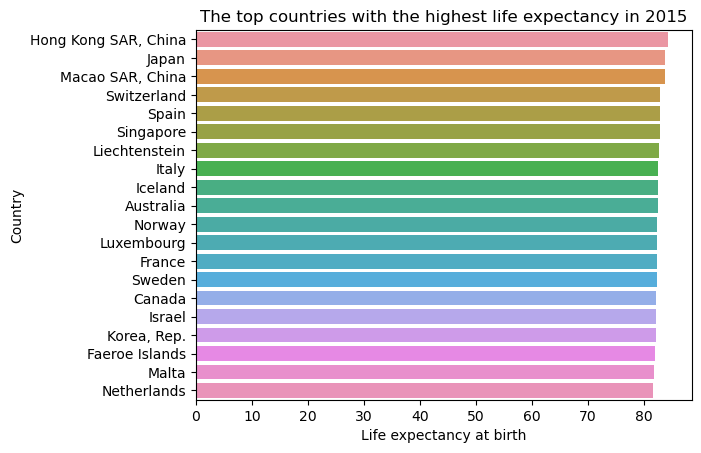

In [394]:
sns.barplot(y='Country', x='Life expectancy at birth', 
            data= df3).set(title ="The top countries with the highest life expectancy in 2015")

# Question 3: Which countries achieved high primary school completion rate in 2015?

### Identify the countries with the highest primary completion rate for 2015

In [294]:
df4= df[df['Year']==2015].sort_values(by='Primary completion rate', ascending=False).head(20)
df4.head()

,Year,Country,Primary completion rate,Population,Life expectancy at birth,Adult literacy rate
5594,2015,Seychelles,122.222221,93419.0,74.295122,NaN
5591,2015,Saudi Arabia,118.242279,31557144.0,74.400000,NaN
5482,2015,Ecuador,115.719528,16144368.0,76.102000,94.455658
5525,2015,Kazakhstan,113.229279,17542806.0,72.000000,NaN
5532,2015,Kyrgyz Republic,112.982910,5956900.0,70.651220,NaN


[Text(0.5, 1.0, 'The top 20 countries in primary completion rate in 2015')]

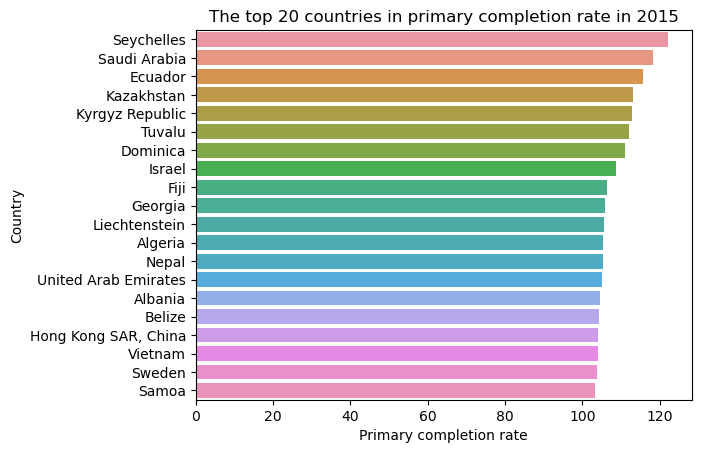

In [296]:
sns.barplot(y='Country', x='Primary completion rate', 
            data= df4).set(title ="The top 20 countries in primary completion rate in 2015")

# Question 4. What is the distribution of the global life expectancy data?

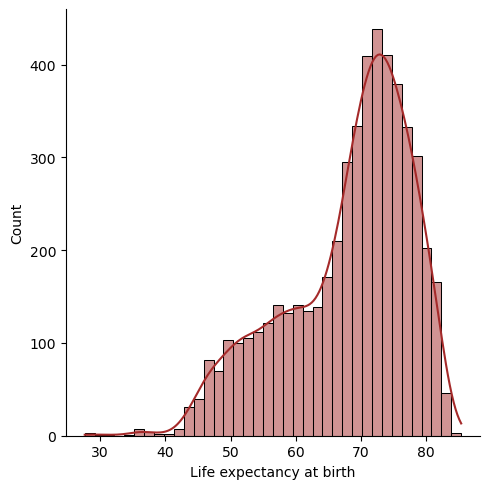

In [397]:
sns.displot(data=df, x='Life expectancy at birth', kde=True,color="brown")

# Question 5: What is the relationship between life expectacy and primary school completion rate

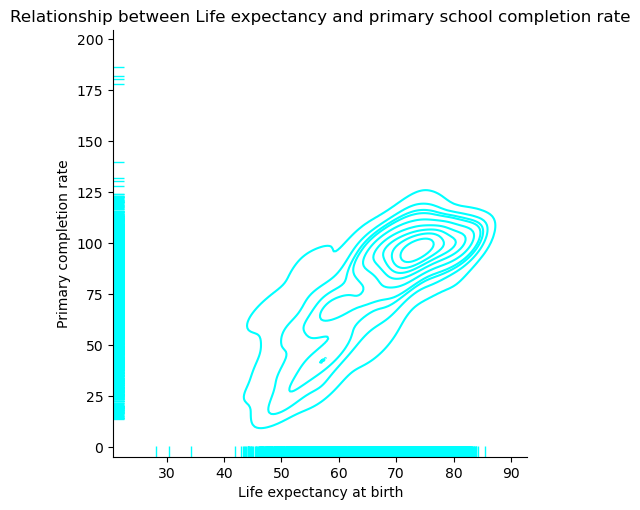

In [413]:
sns.displot(data=df, x='Life expectancy at birth', y= 'Primary completion rate', kind = 'kde', rug= True, color='cyan').set(title="Relationship between Life expectancy and primary school completion rate")

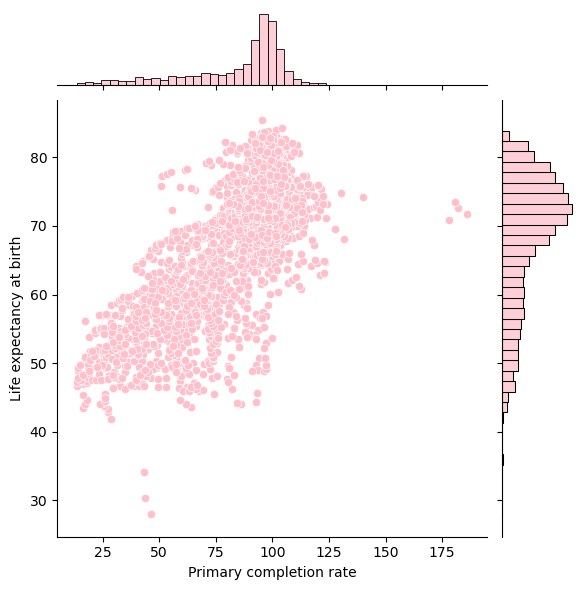

In [414]:
sns.jointplot(data = df, x= 'Primary completion rate', y="Life expectancy at birth", 
              color= "pink")

### Calculate the correlation coefficient to determine the direction and strength of correlation. 

In [424]:
df6 = df.dropna()
df6.head()
scipy.stats.pearsonr(df6["Primary completion rate"], df6["Life expectancy at birth"])

PearsonRResult(statistic=0.8101555515714806, pvalue=1.5656393642499857e-98)

### Conclusion: The results indicate that primary completion rate and life expectacy are positively correlated (R=0.81 and Pvalue= 1 * 10^-98). 